In [ ]:
# import modules
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
# read in data
df = pd.read_excel(r'C:/Users/Alley/Documents/DataScience_Portfolio/Project_ MI COVID Visualization/Diagnostic Tests by Result and County March 2020 June 2022.xlsx')
df.head()

In [ ]:
df.describe()

In [ ]:
# check for missing data

for col in df.columns:
    pct_missing = (np.mean(df[col].isnull()))
    num_missing = df[col].isnull().sum()
    print(('{0} - {1:%} - {2}').format(col, pct_missing, num_missing))

In [ ]:
df.dtypes

In [ ]:
# isolate data by date pop up sites were opened
df_dates = df.query("20210301 < MessageDate < 20210531")
df_dates

In [ ]:
# isolate popup site data
df_bay = df_dates
df_bay = df_bay[df_bay['COUNTY'].str.contains("Bay")]
df_bay

In [ ]:
# isolate surrounding county data
df_arenac = df_dates
df_arenac = df_arenac[df_arenac['COUNTY'].str.contains("Arenac")]

df_gladwin = df_dates
df_gladwin = df_gladwin[df_gladwin['COUNTY'].str.contains("Gladwin")]

df_midland = df_dates
df_midland = df_midland[df_midland['COUNTY'].str.contains("Midland")]

df_saginaw = df_dates
df_saginaw = df_saginaw[df_saginaw['COUNTY'].str.contains("Saginaw")]

In [ ]:
# df_arenac 90 rows
# df_gladwin 90 rows
# df_midland 90 rows
# df_saginaw 90 rows
# combined table should have 360 rows

In [ ]:
# combine surrounding county data
dfs = [df_arenac, df_gladwin, df_midland, df_saginaw]
nan_value = 'NA'

df_surround = pd.concat(dfs, join='outer', axis=0).fillna(nan_value)
df_surround
# sanity check: combined table has 360 rows

In [ ]:
# group surrounding data by message date and average testing numbers
surround = df_surround.groupby('MessageDate').agg({'Total': ['mean', 'min', 'max']})
surround["SiteType"] = "Surrounding"
surround

In [ ]:
# min, max, and mean of Bay County data
bay = df_bay.groupby('MessageDate').agg({'Total': ['mean', 'min', 'max']})
bay["SiteType"] = "PopUp"
bay

The pop up sites in Bay county were opened on April 5 2021 and April 7 2021

Compare the data of Bay county to the surounding counties before and after the opening dates

In [ ]:
# select data for before April 5
bay_before = bay.query("MessageDate <= 20210405")
surround_before = surround.query("MessageDate <= 20210405")

In [ ]:
# select data for after April 7
bay_after = bay.query("MessageDate >= 20210407")
surround_after = surround.query("MessageDate >= 20210407")

In [ ]:
pd.set_option('display.max_rows', None)
before = pd.concat([bay_before, surround_before], sort=False)
before["TimeFrame"] = "before"
before

In [ ]:
after = pd.concat([bay_after, surround_after], sort=False)
after["TimeFrame"] = "after"
after

In [118]:
bay_full = pd.concat([before, after], sort = False)
bay_full

Total                SiteType TimeFrame
               mean  min   max                       
MessageDate                                          
2021-03-02   514.00  514   514        PopUp    before
2021-03-03   470.00  470   470        PopUp    before
2021-03-04   328.00  328   328        PopUp    before
2021-03-05   234.00  234   234        PopUp    before
2021-03-06   165.00  165   165        PopUp    before
2021-03-07   145.00  145   145        PopUp    before
2021-03-08   110.00  110   110        PopUp    before
2021-03-09   540.00  540   540        PopUp    before
2021-03-10   296.00  296   296        PopUp    before
2021-03-11   392.00  392   392        PopUp    before
2021-03-12   278.00  278   278        PopUp    before
2021-03-13   140.00  140   140        PopUp    before
2021-03-14   206.00  206   206        PopUp    before
2021-03-15   121.00  121   121        PopUp    before
2021-03-16   556.00  556   556        PopUp    before
2021-03-17   388.00  388   388        PopUp    before
2021-03-18   366.00  366   366        PopUp    before
2021-03-19   233.00  233   233        PopUp    before
2021-03-20   172.00  172   172        PopUp    before
2021-03-21   199.00  199   199        PopUp    before
2021-03-22   120.00  120   120        PopUp    before
2021-03-23   299.00  299   299        PopUp    before
2021-03-24   259.00  259   259        PopUp    before
2021-03-25   290.00  290   290        PopUp    before
2021-03-26   311.00  311   311        PopUp    before
2021-03-27   208.00  208   208        PopUp    before
2021-03-28   253.00  253   253        PopUp    before
2021-03-29   149.00  149   149        PopUp    before
2021-03-30   322.00  322   322        PopUp    before
2021-03-31   339.00  339   339        PopUp    before
2021-04-01   292.00  292   292        PopUp    before
2021-04-02   259.00  259   259        PopUp    before
2021-04-03   217.00  217   217        PopUp    before
2021-04-04   291.00  291   291        PopUp    before
2021-04-05   148.00  148   148        PopUp    before
2021-03-02   262.75   34   693  Surrounding    before
2021-03-03   293.75   50   885  Surrounding    before
2021-03-04   255.00   39   717  Surrounding    before
2021-03-05   202.75   36   503  Surrounding    before
2021-03-06   123.50   36   292  Surrounding    before
2021-03-07   174.00   18   505  Surrounding    before
2021-03-08   109.50   17   233  Surrounding    before
2021-03-09   226.00   32   643  Surrounding    before
2021-03-10   304.50   69   793  Surrounding    before
2021-03-11   227.75   38   597  Surrounding    before
2021-03-12   250.00   39   710  Surrounding    before
2021-03-13   155.75   21   373  Surrounding    before
2021-03-14   147.00   35   429  Surrounding    before
2021-03-15   127.75   52   256  Surrounding    before
2021-03-16   205.75   28   569  Surrounding    before
2021-03-17   279.75   68   760  Surrounding    before
2021-03-18   274.50   37   713  Surrounding    before
2021-03-19   243.50   46   672  Surrounding    before
2021-03-20   144.75   34   361  Surrounding    before
2021-03-21   141.75   32   345  Surrounding    before
2021-03-22    84.25   12   255  Surrounding    before
2021-03-23   240.75   53   523  Surrounding    before
2021-03-24   251.50   44   729  Surrounding    before
2021-03-25   187.00   43   506  Surrounding    before
2021-03-26   243.50   30   647  Surrounding    before
2021-03-27   149.00   28   441  Surrounding    before
2021-03-28   150.75   26   427  Surrounding    before
2021-03-29   177.25   41   334  Surrounding    before
2021-03-30   181.00   32   459  Surrounding    before
2021-03-31   272.00   50   718  Surrounding    before
2021-04-01   224.75   45   572  Surrounding    before
2021-04-02   275.25   37   753  Surrounding    before
2021-04-03   162.50   48   360  Surrounding    before
2021-04-04   179.50   49   432  Surrounding    before
2021-04-05   160.00   53   336  Surrounding    before
2021-04-07   371.00  371   371        PopUp     after
2021-04-08   442.0

In [123]:
bay_full.columns = ['_'.join(col).rstrip('_') for col in bay_full.columns.values]
print(bay_full)

     level_0  index MessageDate  Total_mean  Total_min  Total_max  \
0          0      0  2021-03-02      514.00        514        514   
1          1      1  2021-03-03      470.00        470        470   
2          2      2  2021-03-04      328.00        328        328   
3          3      3  2021-03-05      234.00        234        234   
4          4      4  2021-03-06      165.00        165        165   
5          5      5  2021-03-07      145.00        145        145   
6          6      6  2021-03-08      110.00        110        110   
7          7      7  2021-03-09      540.00        540        540   
8          8      8  2021-03-10      296.00        296        296   
9          9      9  2021-03-11      392.00        392        392   
10        10     10  2021-03-12      278.00        278        278   
11        11     11  2021-03-13      140.00        140        140   
12        12     12  2021-03-14      206.00        206        206   
13        13     13  2021-03-15   

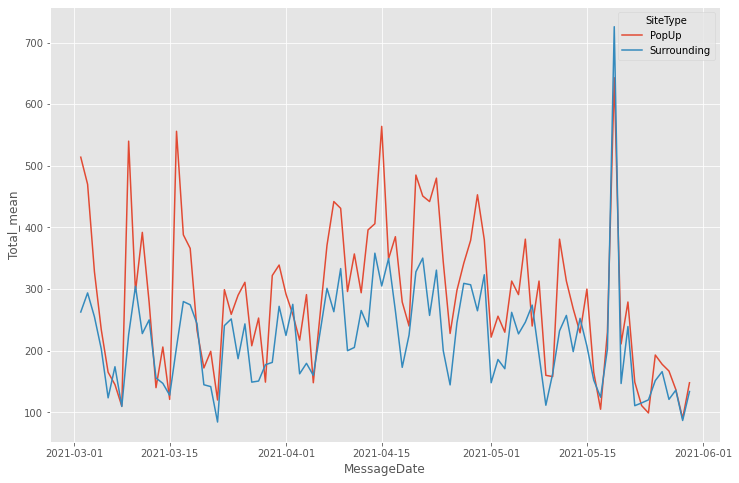

In [130]:
sns.lineplot(x="MessageDate", y="Total_mean", hue="SiteType", data=bay_full);

In [151]:
# perform 1 sample t-test to see if bay area numbers are significantly different from surrounding area
import scipy.stats as stats

bay_mean = bay_full.where(bay_full['SiteType'] == 'PopUp')
bay_mean = bay_mean.dropna()
bay_mean = bay_mean['Total_mean'].to_numpy()
bay_mean = bay_mean.astype(int)

surrounding_mean = bay_full.where(bay_full['SiteType'] == 'Surrounding')
surrounding_mean = surrounding_mean.dropna()
surrounding_mean = surrounding_mean['Total_mean'].to_numpy()
surrounding_mean =  surrounding_mean.astype(int)


stats.ttest_ind(a=bay_mean, b=surrounding_mean, equal_var=True)

Ttest_indResult(statistic=4.404363505722441, pvalue=1.8379760681601758e-05)

# Conclusion
H0 => µ1 = µ2 (population mean of Bay County is equal to Surrounding Counties)
HA => µ1 ≠µ2 (population mean of Bay County is different from Surrounding Counties)

Since the p-value (0.00001) is less than alpha = 0.05 so we reject the null hypothesis of the test. We have sufficient evidence to say that the mean of total test numbers between the two data groups is significantly different.

Bay County has significantly more tests on average than the surrounding counties. However, one must note that this is true before and after pop up sites are set up. Therefore, there is something beside pop up site presence that increases testing numbers.